In [1]:
import torch 
import dgl
import networkx as nx
dgl.__version__

Using backend: pytorch


'0.5.0'

In [2]:
u,v=torch.tensor([0,0,0,1]),torch.tensor([1,2,3,3])
g=dgl.graph((u,v))
print(type(g))

<class 'dgl.heterograph.DGLHeteroGraph'>


In [3]:
print(g.nodes())

tensor([0, 1, 2, 3])


In [4]:
print(g.edges())

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))


In [5]:
print(g.edges(form='all'))

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]), tensor([0, 1, 2, 3]))


In [6]:
g=dgl.graph((u,v),num_nodes=8)

In [7]:
u,v=torch.tensor([0,0,0,1],dtype=torch.int64),torch.tensor([1,2,3,3],dtype=torch.int64)
g=dgl.graph((u,v))

In [8]:
dgl.__version__

'0.5.0'

In [11]:
type(g)

dgl.heterograph.DGLHeteroGraph

In [12]:
edges = torch.tensor([2, 5, 3]), torch.tensor([3, 5, 0]) 
g64=dgl.graph(edges,idtype=torch.int64)
g64.ntypes,g64.etypes

(['_N'], ['_E'])

In [13]:
g.canonical_etypes

[('_N', '_E', '_N')]

In [14]:
# 同构图
hg=dgl.heterograph({('node_type', 'edge_type', 'node_type'): (u, v)})
hg.canonical_etypes

[('node_type', 'edge_type', 'node_type')]

In [15]:
# 二分图
bg=dgl.heterograph({('source_type', 'edge_type', 'destination_type'): (u, v)})
bg.canonical_etypes,bg

([('source_type', 'edge_type', 'destination_type')],
 Graph(num_nodes={'destination_type': 4, 'source_type': 2},
       num_edges={('source_type', 'edge_type', 'destination_type'): 4},
       metagraph=[('source_type', 'destination_type', 'edge_type')]))

In [25]:
graph_data = {
   ('drug', 'interacts', 'drug'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (torch.tensor([0, 1]), torch.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (torch.tensor([1]), torch.tensor([2]))
}
g = dgl.heterograph(graph_data)
g

Graph(num_nodes={'disease': 3, 'drug': 3, 'gene': 4},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'interacts', 'gene'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'gene', 'interacts'), ('drug', 'disease', 'treats')])

In [17]:
g.__class__.__dict__

mappingproxy({'__module__': 'dgl.heterograph',
              '__doc__': 'Class for storing graph structure and node/edge feature data.\n\n    There are a few ways to create create a DGLGraph:\n\n    * To create a homogeneous graph from Tensor data, use :func:`dgl.graph`.\n    * To create a heterogeneous graph from Tensor data, use :func:`dgl.heterograph`.\n    * To create a graph from other data sources, use ``dgl.*`` create ops. See\n      :ref:`api-graph-create-ops`.\n\n    Read the user guide chapter :ref:`guide-graph` for an in-depth explanation about its\n    usage.\n    ',
              'is_block': False,
              '__init__': <function dgl.heterograph.DGLHeteroGraph.__init__(self, gidx=[], ntypes=['_U'], etypes=['_V'], node_frames=None, edge_frames=None, **deprecate_kwargs)>,
              '_init': <function dgl.heterograph.DGLHeteroGraph._init(self, gidx, ntypes, etypes, node_frames, edge_frames)>,
              '__setstate__': <function dgl.heterograph.DGLHeteroGraph.__set

In [18]:
g=dgl.graph((u,v))

In [19]:
g.__class__.__dict__

mappingproxy({'__module__': 'dgl.heterograph',
              '__doc__': 'Class for storing graph structure and node/edge feature data.\n\n    There are a few ways to create create a DGLGraph:\n\n    * To create a homogeneous graph from Tensor data, use :func:`dgl.graph`.\n    * To create a heterogeneous graph from Tensor data, use :func:`dgl.heterograph`.\n    * To create a graph from other data sources, use ``dgl.*`` create ops. See\n      :ref:`api-graph-create-ops`.\n\n    Read the user guide chapter :ref:`guide-graph` for an in-depth explanation about its\n    usage.\n    ',
              'is_block': False,
              '__init__': <function dgl.heterograph.DGLHeteroGraph.__init__(self, gidx=[], ntypes=['_U'], etypes=['_V'], node_frames=None, edge_frames=None, **deprecate_kwargs)>,
              '_init': <function dgl.heterograph.DGLHeteroGraph._init(self, gidx, ntypes, etypes, node_frames, edge_frames)>,
              '__setstate__': <function dgl.heterograph.DGLHeteroGraph.__set

In [21]:
g.metagraph

<bound method DGLHeteroGraph.metagraph of Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})>

In [23]:
g.number_of_nodes()

4

In [26]:
g.get_ntype_id('disease')

0

In [27]:
g.srcnodes('gene')

tensor([0, 1, 2, 3])

In [28]:
g.dstnodes('gene')

tensor([0, 1, 2, 3])

In [29]:
g.nodes('disease')

tensor([0, 1, 2])

In [30]:
g.nodes['drug'].data['hv']=torch.ones(3,1)
g.nodes['drug'].data['hv']

tensor([[1.],
        [1.],
        [1.]])

In [31]:
g.edges['treats'].data['he'] = torch.zeros(1, 1)
g.edges['treats'].data['he']

tensor([[0.]])

In [32]:
g.edges['treats'].data

{'he': tensor([[0.]])}

In [33]:
g.nodes['gene'].data

{}

In [34]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
   ('drug', 'is similar', 'drug'): (torch.tensor([0, 1]), torch.tensor([2, 3]))
})
g.nodes()
g.ndata['hv']=torch.ones(4,1)

In [35]:
g.nodes['drug']

NodeSpace(data={'hv': tensor([[1.],
        [1.],
        [1.],
        [1.]])})

In [36]:
g.srctypes

['drug']

In [37]:
# 从磁盘加载异构图

In [38]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (torch.tensor([0, 1]), torch.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (torch.tensor([1]), torch.tensor([2]))
})

In [39]:
g.nodes['drug'].data['hv'] = torch.ones(3, 1)

In [40]:
eg = g.edge_type_subgraph([('drug', 'interacts', 'drug'),('drug', 'treats', 'disease')])

In [41]:
eg

Graph(num_nodes={'disease': 3, 'drug': 3},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'disease', 'treats')])

In [42]:
eg.nodes['drug'].data['hv']

tensor([[1.],
        [1.],
        [1.]])

In [43]:
# 将异构图转化为同构图
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (torch.tensor([0, 1]), torch.tensor([1, 2])),
   ('drug', 'treats', 'disease'): (torch.tensor([1]), torch.tensor([2]))})
g.nodes['drug'].data['hv'] = torch.zeros(3, 1)
g.nodes['disease'].data['hv'] = torch.ones(3, 1)
g.edges['interacts'].data['he'] = torch.zeros(2, 1)
g.edges['treats'].data['he'] = torch.zeros(1, 2)

In [ ]:
dgl.sum_nodes(g)

TypeError: sum_nodes() missing 1 required positional argument: 'feat'

In [45]:
dgl.DGLGraph.__dict__

mappingproxy({'__module__': 'dgl.heterograph',
              '__doc__': 'Class for storing graph structure and node/edge feature data.\n\n    There are a few ways to create create a DGLGraph:\n\n    * To create a homogeneous graph from Tensor data, use :func:`dgl.graph`.\n    * To create a heterogeneous graph from Tensor data, use :func:`dgl.heterograph`.\n    * To create a graph from other data sources, use ``dgl.*`` create ops. See\n      :ref:`api-graph-create-ops`.\n\n    Read the user guide chapter :ref:`guide-graph` for an in-depth explanation about its\n    usage.\n    ',
              'is_block': False,
              '__init__': <function dgl.heterograph.DGLHeteroGraph.__init__(self, gidx=[], ntypes=['_U'], etypes=['_V'], node_frames=None, edge_frames=None, **deprecate_kwargs)>,
              '_init': <function dgl.heterograph.DGLHeteroGraph._init(self, gidx, ntypes, etypes, node_frames, edge_frames)>,
              '__setstate__': <function dgl.heterograph.DGLHeteroGraph.__set

In [46]:
# Source nodes for edges (2, 1), (3, 2), (4, 3)
src_ids = torch.tensor([2, 3, 4])
# Destination nodes for edges (2, 1), (3, 2), (4, 3)
dst_ids = torch.tensor([1, 2, 3])
g = dgl.graph((src_ids, dst_ids))
g = dgl.graph((src_ids, dst_ids), num_nodes=100)
type(g)

dgl.heterograph.DGLHeteroGraph

In [47]:
g = dgl.graph((src_ids, dst_ids), idtype=torch.int32, device='cuda:0')

In [48]:
type(g)

dgl.heterograph.DGLHeteroGraph

In [49]:
dgl.DGLGraph.__dict__

mappingproxy({'__module__': 'dgl.heterograph',
              '__doc__': 'Class for storing graph structure and node/edge feature data.\n\n    There are a few ways to create create a DGLGraph:\n\n    * To create a homogeneous graph from Tensor data, use :func:`dgl.graph`.\n    * To create a heterogeneous graph from Tensor data, use :func:`dgl.heterograph`.\n    * To create a graph from other data sources, use ``dgl.*`` create ops. See\n      :ref:`api-graph-create-ops`.\n\n    Read the user guide chapter :ref:`guide-graph` for an in-depth explanation about its\n    usage.\n    ',
              'is_block': False,
              '__init__': <function dgl.heterograph.DGLHeteroGraph.__init__(self, gidx=[], ntypes=['_U'], etypes=['_V'], node_frames=None, edge_frames=None, **deprecate_kwargs)>,
              '_init': <function dgl.heterograph.DGLHeteroGraph._init(self, gidx, ntypes, etypes, node_frames, edge_frames)>,
              '__setstate__': <function dgl.heterograph.DGLHeteroGraph.__set

In [51]:
import torch as th
u, v = th.tensor([0, 0, 0, 1]), th.tensor([1, 2, 3, 3])
g = dgl.graph((u, v))
print(g) 

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


In [52]:
print(g.nodes())

tensor([0, 1, 2, 3])


In [53]:
print(g.edges())

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))


In [54]:
print(g.edges(form='all'))

(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]), tensor([0, 1, 2, 3]))


In [55]:
g = dgl.graph((u, v), num_nodes=8)

In [56]:
bg = dgl.to_bidirected(g)

In [57]:
bg.edges()

(tensor([0, 0, 0, 1, 1, 2, 3, 3]), tensor([1, 2, 3, 0, 3, 0, 0, 1]))

In [58]:
edges=th.tensor([2,5,3]),th.tensor([3,5,0])
g64=dgl.graph(edges)
print(g64.idtype)

torch.int64


In [59]:
g32=dgl.graph(edges,idtype=th.int32)
g32.idtype

torch.int32

In [60]:
g64_2=g32.long()
g64_2.idtype

torch.int64

In [61]:
g32_2=g64.int()
g32_2.idtype

torch.int32

In [82]:
g=dgl.graph(([0,0,1,5],[1,2,2,0]))
type(g)

dgl.heterograph.DGLHeteroGraph

In [63]:
g.ndata['x']=th.ones(g.num_nodes(),3)
g.edata['x']=th.ones(g.num_edges(),dtype=th.int32)

In [64]:
g

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={'x': Scheme(shape=(), dtype=torch.int32)})

In [67]:
g.ndata['y']=th.randn(g.num_nodes(),5)
g.ndata['x'][[1,3]]
#特征张量使用”行优先”的原则，即每个行切片储存1个节点或1条边的特征

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [66]:
g.edata['x'][th.tensor([0,3])]

tensor([1, 1], dtype=torch.int32)

In [68]:
# 边 0->1, 0->2, 0->3, 1->3
edges = th.tensor([0, 0, 0, 1]), th.tensor([1, 2, 3, 3])
weights = th.tensor([0.1, 0.6, 0.9, 0.7])  # 每条边的权重
g = dgl.graph(edges)
g.edata['w'] = weights  # 将其命名为 'w'
g

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)})

In [69]:
import scipy.sparse as sp

In [70]:
# 稀疏矩阵
spmat = sp.rand(100, 100, density=0.05) # 5%非零项
dgl.from_scipy(spmat)                   # 来自SciPy

Graph(num_nodes=100, num_edges=500,
      ndata_schemes={}
      edata_schemes={})

In [73]:
print(spmat)

  (15, 16)	0.5832530923377719
  (43, 69)	0.28736688982524883
  (84, 8)	0.08426376683838288
  (38, 97)	0.6821257953645568
  (32, 46)	0.5673826475013406
  (49, 14)	0.11939496900482494
  (98, 5)	0.35080533739091824
  (3, 31)	0.5984417994977443
  (41, 3)	0.043245407613400566
  (95, 71)	0.030143127626510835
  (10, 76)	0.36136124811105796
  (39, 87)	0.5870975880948296
  (77, 98)	0.5736853124329755
  (0, 62)	0.49002153374519963
  (62, 6)	0.5521775566062669
  (24, 48)	0.04709182436292447
  (72, 55)	0.6109637493062556
  (7, 98)	0.7564606014912362
  (30, 59)	0.6124069010214678
  (77, 82)	0.6006765111610909
  (80, 23)	0.6952900630335996
  (60, 22)	0.6810596147140844
  (4, 34)	0.9590288353894779
  (85, 11)	0.841773385193871
  (58, 93)	0.8962842654234242
  :	:
  (54, 30)	0.012284531808919752
  (11, 16)	0.1689300236448218
  (73, 0)	0.43519200644397416
  (90, 16)	0.2660648375644987
  (4, 41)	0.4052684951201496
  (63, 26)	0.940135493939867
  (80, 99)	0.13140528195365264
  (68, 68)	0.17761796577618527


In [74]:
# networkx 
import networkx as nx
nx_g = nx.path_graph(5) # 一条链路0-1-2-3-4
dgl.from_networkx(nx_g) # 来自NetworkX

Graph(num_nodes=5, num_edges=8,
      ndata_schemes={}
      edata_schemes={})

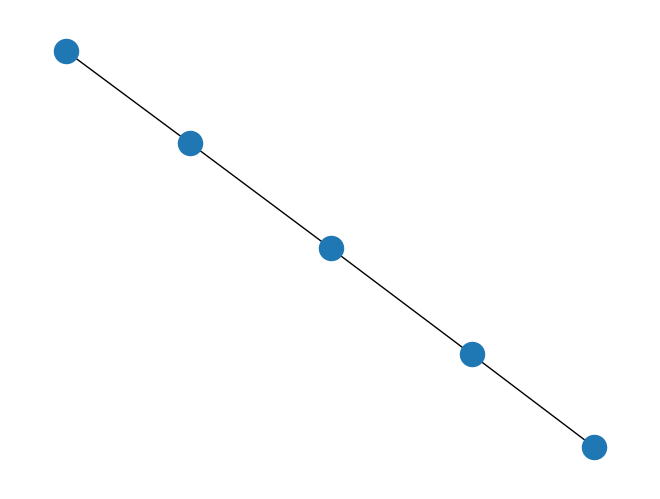

In [75]:
nx.draw(nx_g)

In [76]:
nxg = nx.DiGraph([(2, 1), (1, 2), (2, 3), (0, 0)])
dgl.from_networkx(nxg)

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})

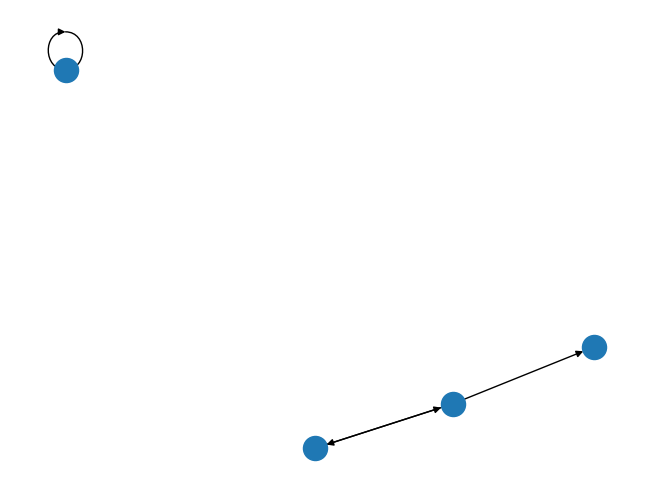

In [77]:
nx.draw(nxg)

In [88]:
# 异构图
graph_data = {
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
}
g = dgl.heterograph(graph_data)
g.ntypes

['disease', 'drug', 'gene']

In [79]:
g.etypes

['interacts', 'interacts', 'treats']

In [80]:
g.canonical_etypes

[('drug', 'interacts', 'drug'),
 ('drug', 'interacts', 'gene'),
 ('drug', 'treats', 'disease')]

In [85]:
# 一个同构图
dgl.heterograph({('node_type', 'edge_type', 'node_type'): (u, v)})
# 一个二分图
dgl.heterograph({('source_type', 'edge_type', 'destination_type'): (u, v)})

Graph(num_nodes={'destination_type': 4, 'source_type': 2},
      num_edges={('source_type', 'edge_type', 'destination_type'): 4},
      metagraph=[('source_type', 'destination_type', 'edge_type')])

In [89]:
g

Graph(num_nodes={'disease': 3, 'drug': 3, 'gene': 4},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'interacts', 'gene'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'gene', 'interacts'), ('drug', 'disease', 'treats')])

In [90]:
g.metagraph().edges()

OutMultiEdgeDataView([('drug', 'drug'), ('drug', 'gene'), ('drug', 'disease')])

In [91]:
g.num_nodes()

10

In [92]:
g.num_nodes('drug')

3

In [93]:
g.nodes['drug'].data['hv']=th.ones(3,1)

In [94]:
g.nodes['drug'].data['hv']

tensor([[1.],
        [1.],
        [1.]])

In [95]:
g.edges['treats'].data['he']=th.zeros(1,1)
g.edges['treats'].data['he']

tensor([[0.]])

In [96]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'is similar', 'drug'): (th.tensor([0, 1]), th.tensor([2, 3]))
})

In [97]:
g.nodes()

tensor([0, 1, 2, 3])

In [98]:
g.ndata['hv']=th.ones(4,1)

In [99]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
})

In [100]:
g.nodes['drug'].data['hv'] = th.ones(3, 1)

In [101]:
g

Graph(num_nodes={'disease': 3, 'drug': 3, 'gene': 4},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'interacts', 'gene'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'gene', 'interacts'), ('drug', 'disease', 'treats')])

In [102]:
eg = dgl.edge_type_subgraph(g, [('drug', 'interacts', 'drug'),
                                ('drug', 'treats', 'disease')])
eg

Graph(num_nodes={'disease': 3, 'drug': 3},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'disease', 'treats')])

In [103]:
eg.nodes['drug'].data['hv']

tensor([[1.],
        [1.],
        [1.]])

In [104]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))})

In [105]:
g.nodes['drug'].data['hv'] = th.zeros(3, 1)
g.nodes['disease'].data['hv'] = th.ones(3, 1)
g.edges['interacts'].data['he'] = th.zeros(2, 1)
g.edges['treats'].data['he'] = th.zeros(1, 2)

In [106]:
hg=dgl.to_homogeneous(g)

In [108]:
'hv' in hg.ndata

False

In [109]:
hg = dgl.to_homogeneous(g, edata=['he'])
# 对于要拷贝的特征，DGL假定不同类型的节点或边的需要合并的特征具有相同的大小和数据类型

DGLError: Cannot concatenate column he with shape Scheme(shape=(2,), dtype=torch.float32) and shape Scheme(shape=(1,), dtype=torch.float32)

In [110]:
hg = dgl.to_homogeneous(g, ndata=['hv'])
hg.ndata['hv']

tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]])

In [111]:
dgl.NTYPE

'_TYPE'

In [112]:
g.ntypes

['disease', 'drug']

In [113]:
hg.ndata[dgl.NTYPE]

tensor([0, 0, 0, 1, 1, 1])

In [117]:
hg.ndata[dgl.NID]

tensor([0, 1, 2, 0, 1, 2])

In [118]:
hg.ndata

{'hv': tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]]), '_TYPE': tensor([0, 0, 0, 1, 1, 1]), '_ID': tensor([0, 1, 2, 0, 1, 2])}

In [119]:
hg

Graph(num_nodes=6, num_edges=3,
      ndata_schemes={'hv': Scheme(shape=(1,), dtype=torch.float32), '_TYPE': Scheme(shape=(), dtype=torch.int64), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_TYPE': Scheme(shape=(), dtype=torch.int64), '_ID': Scheme(shape=(), dtype=torch.int64)})

In [122]:
dgl.ETYPE

'_TYPE'

In [123]:
hg.ntypes

['_N']

In [126]:
hg.ndata[dgl.NTYPE]

tensor([0, 0, 0, 1, 1, 1])

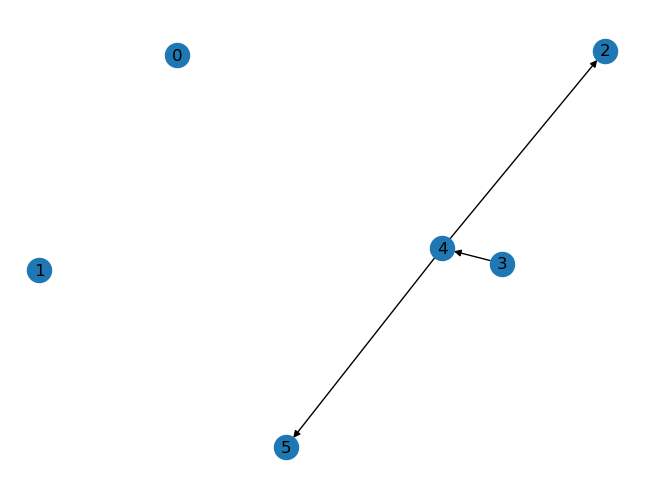

In [128]:
nx.draw(hg.to_networkx(),with_labels=True)

In [129]:
hg.ndata

{'hv': tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]]), '_TYPE': tensor([0, 0, 0, 1, 1, 1]), '_ID': tensor([0, 1, 2, 0, 1, 2])}

In [130]:
hg.ndata[dgl.NID]

tensor([0, 1, 2, 0, 1, 2])

In [131]:
g.etypes

['interacts', 'treats']

In [132]:
hg.edata

{'_TYPE': tensor([0, 0, 1]), '_ID': tensor([0, 1, 0])}

In [133]:
hg.edata[dgl.ETYPE]

tensor([0, 0, 1])

In [134]:
hg.edata[dgl.EID]

tensor([0, 1, 0])

In [135]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
})
sub_g = dgl.edge_type_subgraph(g, [('drug', 'interacts', 'drug'),
                                   ('drug', 'interacts', 'gene')])
h_sub_g = dgl.to_homogeneous(sub_g)
h_sub_g

Graph(num_nodes=7, num_edges=4,
      ndata_schemes={'_TYPE': Scheme(shape=(), dtype=torch.int64), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_TYPE': Scheme(shape=(), dtype=torch.int64), '_ID': Scheme(shape=(), dtype=torch.int64)})

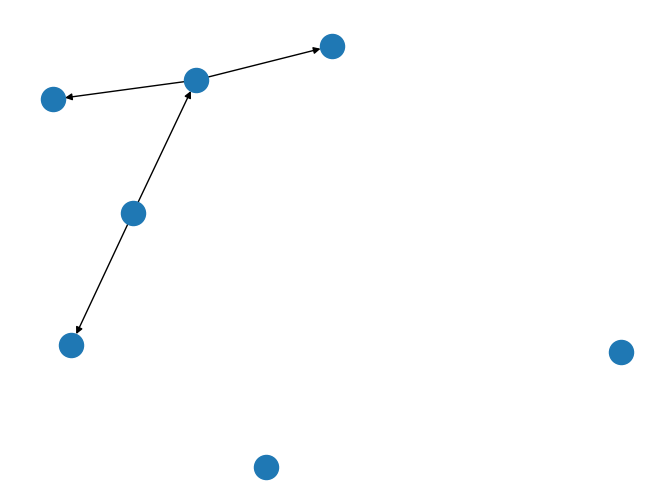

In [137]:
nx.draw(h_sub_g.to_networkx())

In [138]:
u, v = th.tensor([0, 1, 2]), th.tensor([2, 3, 4])
g = dgl.graph((u, v))
g.ndata['x'] = th.randn(5, 3)   # 原始特征在CPU上
g.device

device(type='cpu')

In [139]:
cuda_g = g.to('cuda:0')         # 接受来自后端框架的任何设备对象
cuda_g.device

device(type='cuda', index=0)

In [140]:
cuda_g.ndata['x'].device        # 特征数据也拷贝到了GPU上

device(type='cuda', index=0)

In [141]:
u, v = u.to('cuda:0'), v.to('cuda:0')
g = dgl.graph((u, v))
g.device

device(type='cuda', index=0)

In [142]:
# 使用to或者使用GPU上的张量

In [143]:
cuda_g.in_degrees()

tensor([0, 0, 1, 1, 1], device='cuda:0')

In [145]:
cuda_g.in_edges([2, 2, 4]) # 可以接受非张量类型的参数

(tensor([0, 0, 2], device='cuda:0'), tensor([2, 2, 4], device='cuda:0'))

In [146]:
cuda_g.in_edges(th.tensor([2, 3, 4]).to('cuda:0'))  # 张量类型的参数必须在GPU上

(tensor([0, 1, 2], device='cuda:0'), tensor([2, 3, 4], device='cuda:0'))

In [147]:
cuda_g.ndata['h'] = th.randn(5, 4) 
# gpu cpu 不互通 

DGLError: Cannot assign node feature "h" on device cpu to a graph on device cuda:0. Call DGLGraph.to() to copy the graph to the same device.

In [179]:
import dgl
import torch
import dgl.function as fn
g = dgl.graph(([1, 3, 5, 0, 4, 2, 3, 3, 4, 5], [1, 1, 0, 0, 1, 2, 2, 0, 3, 3]))
g.edata['eid'] = torch.arange(10,dtype=torch.float32)
def reducer(nodes):
    print(nodes.mailbox['eid'])
    return {'n': nodes.mailbox['eid'].sum(1)}

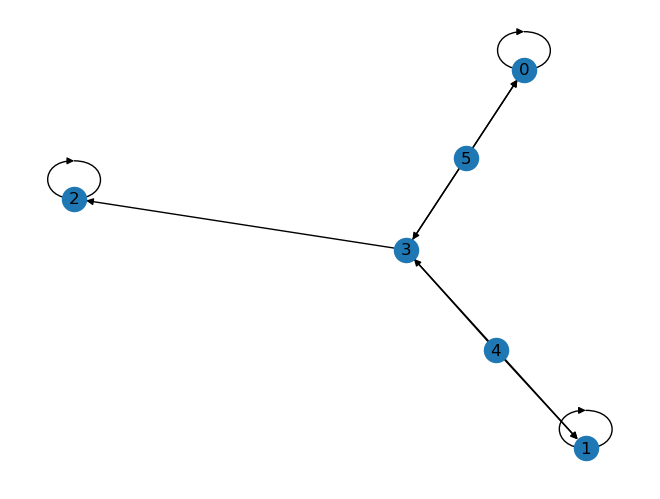

In [175]:
nx.draw(g.to_networkx(),with_labels=True)

In [176]:
g.edata

{'eid': tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}

In [177]:
g.update_all(fn.copy_e('eid', 'eid'), reducer)

tensor([[5, 6],
        [8, 9]])
tensor([[3, 7, 2],
        [0, 1, 4]])


In [178]:
g.ndata

{'n': tensor([12,  5, 11, 17,  0,  0])}

In [166]:
g.edata

{'eid': tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'ed': tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}

In [170]:
def fn_ns(nodes):
    print(nodes.mailbox)  # 查看一下mailbox
    return {'h': nodes.data['x'] + 1}

In [172]:
def update_all_example(graph):
    # 在graph.ndata['ft']中存储结果
    graph.update_all(fn.u_mul_e('ft', 'a', 'm'),
                     fn.sum('m', 'ft'))
    # 在update_all外调用更新函数
    final_ft = graph.ndata['ft'] * 2
    return final_ft

In [180]:
g.update_all(fn.copy_e('eid','eid'),fn.sum('eid','m'))
g.ndata

{'m': tensor([12.,  5., 11., 17.,  0.,  0.])}

In [ ]:
import torch
import torch.nn as nn
node_feat_dim=100
out_dim=30

linear = nn.Parameter(torch.FloatTensor(size=(node_feat_dim * 2, out_dim)))
def concat_message_function(edges):
     return {'cat_feat': torch.cat([edges.src['feat'], edges.dst['feat']], dim=1)}
g.apply_edges(concat_message_function)
g.edata['out'] = g.edata['cat_feat'] @ linear
# 用线性层降维

In [186]:
g.srcdata.__class__.__dict__

mappingproxy({'__module__': 'dgl.view',
              '__doc__': 'The data view class when G.ndata[ntype] is called.',
              '__slots__': ['_graph', '_ntype', '_ntid', '_nodes'],
              '__init__': <function dgl.view.HeteroNodeDataView.__init__(self, graph, ntype, ntid, nodes)>,
              '__getitem__': <function dgl.view.HeteroNodeDataView.__getitem__(self, key)>,
              '__setitem__': <function dgl.view.HeteroNodeDataView.__setitem__(self, key, val)>,
              '__delitem__': <function dgl.view.HeteroNodeDataView.__delitem__(self, key)>,
              '__len__': <function dgl.view.HeteroNodeDataView.__len__(self)>,
              '__iter__': <function dgl.view.HeteroNodeDataView.__iter__(self)>,
              'keys': <function dgl.view.HeteroNodeDataView.keys(self)>,
              'values': <function dgl.view.HeteroNodeDataView.values(self)>,
              '__repr__': <function dgl.view.HeteroNodeDataView.__repr__(self)>,
              '_graph': <member '

In [187]:
g.srcdata.update({'m':th.tensor([0,0,0,0,0,0])})

In [188]:
g.srcdata

{'m': tensor([0, 0, 0, 0, 0, 0])}

In [ ]:
import dgl.function as fn

linear_src = nn.Parameter(torch.FloatTensor(size=(node_feat_dim, out_dim)))
linear_dst = nn.Parameter(torch.FloatTensor(size=(node_feat_dim, out_dim)))
out_src = g.ndata['feat'] @ linear_src
out_dst = g.ndata['feat'] @ linear_dst
g.srcdata.update({'out_src': out_src})
g.dstdata.update({'out_dst': out_dst})
g.apply_edges(fn.u_add_v('out_src', 'out_dst', 'out'))
# 高效 内存不用保存高维feat
# 可以使用 u_add_v 优化

In [ ]:
nid = [0, 2, 3, 6, 7, 9]
sg = g.subgraph(nid)
sg.update_all(message_func, reduce_func, apply_node_func)
# 先给出子图 然后在子图上聚合